1. Data Collection:
We'll use the Titanic dataset

In [1]:
import pandas as pd

# Load the Titanic dataset from a local CSV or a URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)


2. Data Inspection:
Provide an overview of the dataset.

In [2]:
# Check the number of rows and columns
print(df.shape)

# Display the first few rows
print(df.head())

# Get a summary of the dataset
print(df.info())


(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

Observation: Titanic dataset contains 891 samples with 11 features, including Age, Fare (numerical), Sex, Embarked (categorical). The target variable is Survived.

3. Data Preprocessing:
a. Data Cleaning (Handling Missing Values):

In [3]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values for 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop rows with missing values in 'Embarked'
df.dropna(subset=['Embarked'], inplace=True)

# Drop 'Cabin' since it has too many missing values
df.drop('Cabin', axis=1, inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


b. Feature Scaling:
For numerical features like Age and Fare, apply Min-Max Scaling to normalize them.

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Scale numerical features
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


c. Handling Categorical Data:
Encode categorical variables like Sex and Embarked.

In [5]:
# Label encoding for 'Sex' (male=1, female=0)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# One-Hot encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


4. Feature Engineering:

a. Creating New Features:
We'll create two new features:

FamilySize: Combine SibSp and Parch to get the total family size.
IsAlone: A binary feature indicating whether the passenger is alone.

In [6]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create IsAlone feature
df['IsAlone'] = 1  # Initialize to 1 (Alone)
df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # Set to 0 if family size > 1


<ipython-input-6-fa3b3f435fce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # Set to 0 if family size > 1


**5. Handling Imbalanced Data:**

If the target variable Survived is imbalanced, we can apply techniques like SMOTE. However, the Titanic dataset doesn't have a severe imbalance, so this step can be skipped for now.

**6. Data Transformation (Save Preprocessed Data):**

After preprocessing, save the dataset to a CSV file for further analysis.

In [7]:
# Save the preprocessed dataset
df.to_csv('preprocessed_titanic.csv', index=False)


**7. Analysis:**

We can visualize and analyze how data preprocessing and feature engineering affected the dataset.

**a. Visualizations:**
Use matplotlib or seaborn for visualizations.

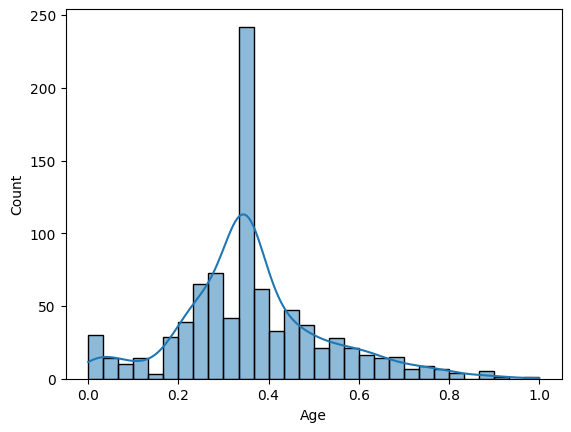

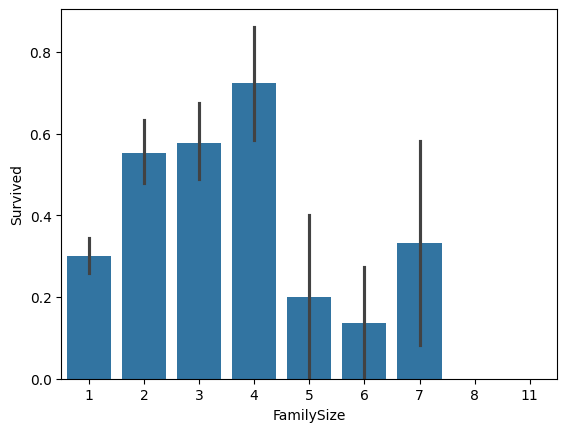

       PassengerId    Survived      Pclass         Sex         Age  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586    0.649044    0.363096   
std     256.998173    0.486260    0.834700    0.477538    0.163168   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     224.000000    0.000000    2.000000    0.000000    0.271174   
50%     446.000000    0.000000    3.000000    1.000000    0.346569   
75%     668.000000    1.000000    3.000000    1.000000    0.434531   
max     891.000000    1.000000    3.000000    1.000000    1.000000   

            SibSp       Parch        Fare  FamilySize     IsAlone  
count  889.000000  889.000000  889.000000  889.000000  889.000000  
mean     0.524184    0.382452    0.062649    1.906637    0.601800  
std      1.103705    0.806761    0.097003    1.614703    0.489803  
min      0.000000    0.000000    0.000000    1.000000    0.000000  
25%      0.000000    0.000000

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Age distribution after scaling
sns.histplot(df['Age'], kde=True)
plt.show()

# Visualize Survived by FamilySize
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.show()

# Summary statistics
print(df.describe())


8. Conclusion:
Data preprocessing helps handle missing values, scale features, and encode categorical data, making the dataset ready for machine learning models.
Feature engineering created FamilySize and IsAlone, adding meaningful information that enhances the representational power of the dataset.

This example provides a structured approach to preprocessing and feature engineering. You can follow a similar process for any dataset you choose.

Commands Summary:
Data Loading:

pd.read_csv()

df.shape, df.head(), df.info()

Data Cleaning:

df.isnull().sum()
df.fillna(), df.dropna(), df.drop()

Feature Scaling:

MinMaxScaler(), scaler.fit_transform()

Handling Categorical Data:

map(), pd.get_dummies()

Feature Engineering:

Creating new columns: df['NewFeature'] = ...
Data Saving:
New Section
df.to_csv()

Visualizations:

seaborn.histplot(), seaborn.barplot(), plt.show()